In [ ]:
my little tool to check if the images and bboxes correspond

after the MSCOCO labels have been converted to yolo format (class center(x,y) w h)
I just want to see random images and their corresponding labels
to know if the conversion is correct or not
pycocotools doesn't provide this directly
1. input path/to/image
2. input path/to/label
3. input image size
4. draw

In [9]:
pwd

u'/'

In [8]:
ls

bin/    etc/             lib32/       opt/   snap/     usr/
boot/   home/            lib64/       proc/  srv/      var/
cdrom/  initrd.img@      lost+found/  root/  swapfile  vmlinuz@
core    initrd.img.old@  media/       run/   sys/      vmlinuz.old@
dev/    lib/             mnt/         sbin/  tmp/


In [10]:
cd ../../../mnt/nas/objectscp

/mnt/nas/objectscp


In [3]:
ls

backupgrandyolo2/         imagenettestsplit/       traincocodontshow/
backupgrandyolo3/         imagenettestsplit_add/   trainfire.txt*
backupgrandyolo4/         imagenettrain/           traingrandyolo/
coco/                     imagenettrainsplit/      trainlabel.txt*
cocoapi/                  imagenettrainsplit_add/  trainsnake/
cocofilediff.txt*         Indian-Snakes-Dataset/   trainyolo/
cocotrain/                mAP_eval/                val2014/
containercocotoyolo.tgz*  split/                   val2014cp/
darknet/                  subsnakes*               val2014label/
darknetpj/                train2014/               val2014label14/
fireandsmoke/             train2014cp/             val2014label14only/
firefromyolomark/         train2014label/          val2017label/
ImageNet/                 train2014label14/        val2017.txt*
imagenet_add/             train2014label14cp/      valfire.txt*
imagenetannotationstxt/   train2014label14cp2/     valgrandyolo/
imagenetcopy/         

In [4]:
cd train2014label14only

/mnt/nas/objectstodetect/train2014label14only


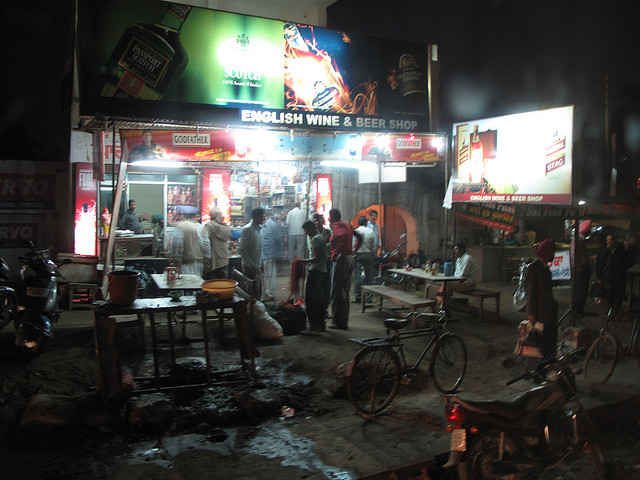

In [5]:
from IPython.display import Image
Image(filename='../train2014/COCO_train2014_000000012650.jpg') 

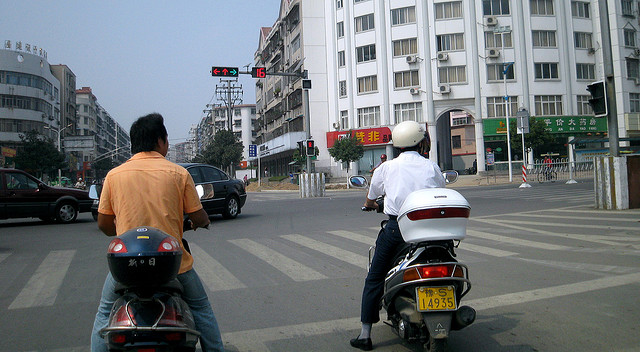

In [11]:
from IPython.display import Image
Image(filename='coco/images/train2014/COCO_train2014_000000014388.jpg') 

In [ ]:
n01729977_10718.txt

In [80]:
import pandas as pd
box = pd.read_csv('../imagenettestsplit_add/n01729977_10718.txt',sep = " ",header = None, index_col = False, names = ['class', 'x', 'y', 'width', 'height'])
#box.names = ['class', 'x', 'y', 'width', 'height']
box

,class,x,y,width,height
0,19,0.406,0.39572,0.808,0.40107
1,17,0.406,0.39572,0.808,0.40107


In [18]:
import pandas as pd
box = pd.read_csv('coco/labels/train2014/yolo/COCO_train2014_000000014388.txt',sep = " ",header = None, index_col = False, names = ['class', 'x', 'y', 'width', 'height'])
#box.names = ['class', 'x', 'y', 'width', 'height']
box


,class,x,y,width,height
0,0,0.266125,0.551080,0.243656,0.176364
1,0,0.265578,0.538906,0.246156,0.167017
2,0,0.074195,0.558168,0.143672,0.154176


In [21]:
def from_yolo_to_draw(box,shape):
    list_of_bbox = list()
    img_h, img_w, _ = shape
    for (index_label, row) in box.iterrows():
        x, y, w, h = row.values[1:5]
        x1, y1 = int((row['x'] + row['width']/2)*img_w), int((row['y'] + row['height']/2)*img_h)
        x2, y2 = int((row['x'] - row['width']/2)*img_w), int((row['y'] - row['height']/2)*img_h)
        list_of_bbox.append((x1,y1,x2,y2))
    return list_of_bbox
        #print(list_of_bbox)
from_yolo_to_draw(box, (350,650,_))

[(252, 223, 93, 162), (252, 217, 92, 159), (94, 222, 1, 168)]

In [ ]:
def from_yolo_to_draw(box,shape):
    list_of_bbox = list()
    img_h, img_w, _ = shape
    for (index_label, row) in box.iterrows():
        x, y, w, h = row.values[1:5]
        x1, y1 = int((row['x'] + row['width']/2)*img_w), int((row['y'] + row['height']/2)*img_h)
        x2, y2 = int((row['x'] - row['width']/2)*img_w), int((row['y'] - row['height']/2)*img_h)
        list_of_bbox.append((x1,y1,x2,y2))
    return list_of_bbox
        #print(list_of_bbox)
from_yolo_to_draw(box, (500,650,_))

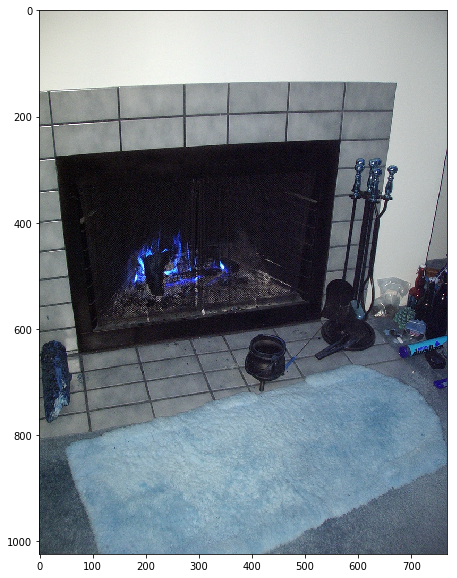

In [77]:
import cv2
img = cv2.imread('../fireandsmoke/FiSmo-Images/Flickr-FireSmoke/trainwithnegative/3068168613.jpg')
plt.figure(figsize=(20,10))
plt.imshow(img)

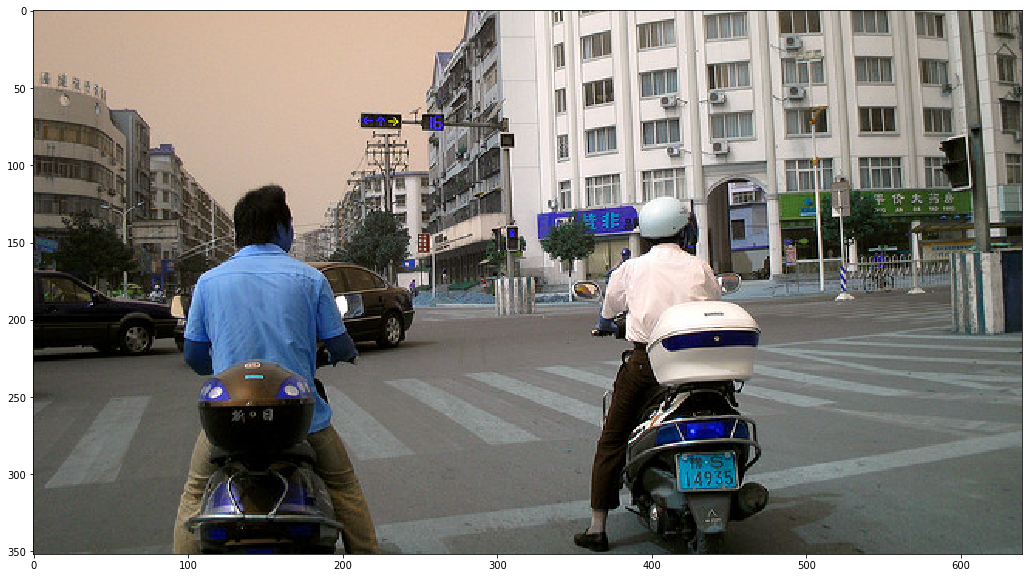

In [23]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('coco/images/train2014/COCO_train2014_000000014388.jpg')
plt.figure(figsize=(20,10))
plt.imshow(img)

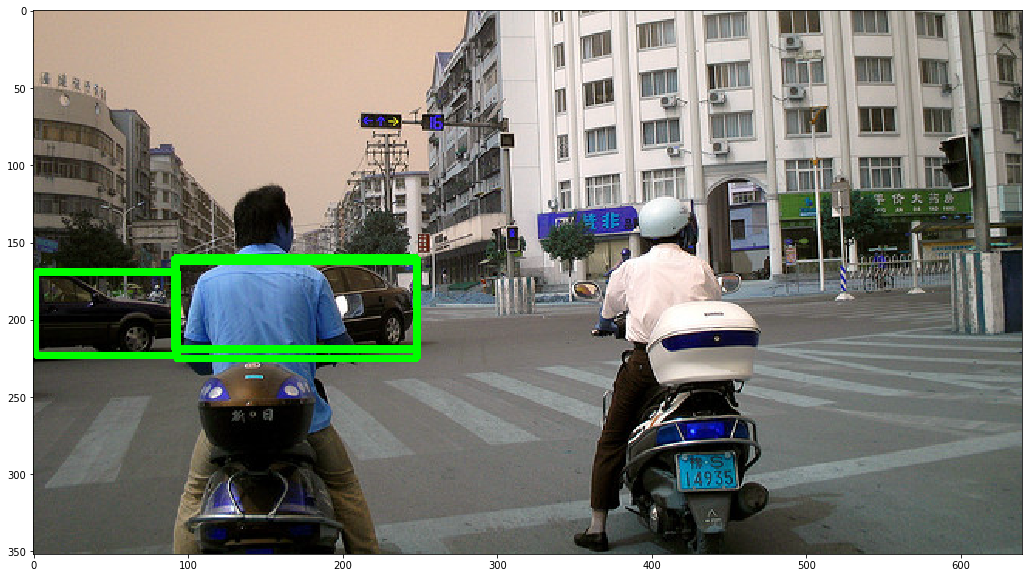

In [22]:
def draw_bboxes(img,box):
    for bbox in from_yolo_to_draw(box,img.shape):
        x1,y1,x2,y2 = bbox
        cv2.rectangle(img,(x1,y1),(x2,y2),(0,255.0),3)
draw_bboxes(img,box)
plt.figure(figsize=(20,10))
plt.imshow(img)

In [ ]:
# in an image like this should label helmet in addition to the original labelling
# how can i know
# find images with motorbike class? and add helmet label?

In [86]:
import gc
gc.collect()

1917